In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms
import torchvision
import os
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import torchvision.utils as tutils
import imageio
import pickle
import copy
from PIL import Image
import h5py 
from torch.utils.data import Dataset, DataLoader
from matplotlib.pyplot import imshow
import pandas as pd

/home/bhushan/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
# Helper routines
IS_CUDA = False
if torch.cuda.is_available():
    IS_CUDA = True
    
def var(x):
    if IS_CUDA:
        x = x.cuda()
    return Variable(x)

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def generate_animation(root, epoch, name):
    images = []
    for e in range(epoch):
        img_name = root+'/image_'+str(e)+'.png'
        images.append(imageio.imread(img_name))
    imageio.mimsave(root+ '/' + name +'.gif', images, fps=5)

def drawLossPlot(generatorLoss, discriminatorLoss, showPlot = False, savePlot = True, loc = ""):
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Vanilla GAN Loss')
    plt.plot(generatorLoss, label='Generator Loss')
    plt.plot(discriminatorLoss, label='Discriminator Loss')
    legend = plt.legend(loc='upper right', shadow=True)
    
    if showPlot:
        plt.show()
    if savePlot:
        plt.savefig(loc+'Loss_Plot_Vanilla_GAN_'+str(num_epochs)+'.png')

def save_image(pic, path):
    grid = torchvision.utils.make_grid(pic, nrow=8, padding=2)
    ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
    im = Image.fromarray(ndarr)
    im.save(path)

class LossModule: 
    def __init__(self):
        self.D_loss = []
        self.G_loss = []

    def insertDiscriminatorLoss(self, lossVal):
        self.D_loss.append(lossVal)
    
    def insertGeneratorLoss(self, lossVal):
        self.G_loss.append(lossVal)
    
    def getDiscriminatorLoss(self):
        return self.D_loss
    
    def getGeneratorLoss(self):
        return self.G_loss
    

In [6]:
synData = 'data/synHao/'
dataSet1='data/synHao/train_0.h5'

In [17]:
import os

hfFiles = []
for file in os.listdir(synData):
    hf = h5py.File(synData+file, 'r')
    hfFiles.append(hf)
hf.keys()

[u'data_1', u'data_2', u'label']

In [35]:
# Synthetic Images
#hf = h5py.File(dataSet1, 'r')
#print hf.keys()

# Data Shape 

syn1 = hf['data_1']
syn2 = hf['data_2']
dlabel = hf['label']
synIm1 = np.array(syn1[:,:,:]) #np.swapaxes(np.array(dset[:,:,:]), 1, 3)
synIm2 = np.array(syn2[:,:,:]) #np.swapaxes(np.array(dset2[:,:,:]), 1, 3)
synLabel = np.array(dlabel)

for i in range(0, len(hfFiles)-1): # in hfFiles:
    syn1 = hfFiles[i]['data_1']
    syn2 = hfFiles[i]['data_2']
    dlabel = hfFiles[i]['label']
    synIm1 = np.concatenate((synIm1, np.array(syn1[:,:,:]))) #np.swapaxes(np.array(dset[:,:,:]), 1, 3)
    synIm2 = np.concatenate((synIm2, np.array(syn2[:,:,:]))) #np.swapaxes(np.array(dset2[:,:,:]), 1, 3)
    synLabel = np.concatenate((synLabel, np.array(dlabel)))
    print slabel.shape
    print synIm1.shape
    print synIm2.shape
    print synLabel.shape

(2500, 27)
(5000, 64, 64, 3)
(5000, 64, 64, 3)
(5000, 27)
(2500, 27)
(7500, 64, 64, 3)
(7500, 64, 64, 3)
(7500, 27)
(2500, 27)
(10000, 64, 64, 3)
(10000, 64, 64, 3)
(10000, 27)


In [33]:
syn1 = hf['data_1']
# print syn1[0]

In [127]:
hf = h5py.File(dataSet1, 'r')
syn1 = hf['data_1']
syn1 = np.array(syn1[:,:,:]).astype(int)
print syn1.shape
image = Image.fromarray(syn1[100].astype('int8'), 'RGB')
image.save('file3.png')

(2500, 64, 64, 3)


In [128]:
image.show()

In [37]:
syn1 = np.moveaxis(synIm1, 1, 3)
syn1 = np.moveaxis(syn1, 1, 2)
syn1 = np.moveaxis(syn1, 2, 3)

syn2 = np.moveaxis(synIm2, 1, 3)
syn2 = np.moveaxis(syn2, 1, 2)
syn2 = np.moveaxis(syn2, 2, 3)

In [ ]:
# print syn3.shape, type(syn3)
# image = Image.fromarray(syn3[10].astype('int8'), 'RGB')
# image.show()

In [39]:
synImage1 = torch.utils.data.DataLoader(syn1, batch_size=50)
synImage2 = torch.utils.data.DataLoader(syn2, batch_size=50)
synLabel = torch.utils.data.DataLoader(synlabel, batch_size=50)

NameError: name 'synlabel' is not defined

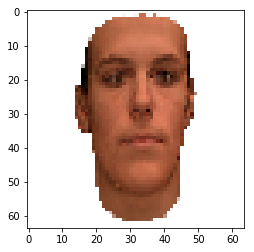

In [130]:
dreal = next(iter(synImage1)) #.type(torch.ShortTensor)
#print dreal.type
show(dreal[0])

In [131]:
image = Image.fromarray(syn1[100].astype('uint8'), 'RGB')
image1 = Image.fromarray(syn2[0].astype('uint8'))
image.save('file2.png')
image.show()
# #image1.show()
# syn1[100].shape

In [132]:
#imshow(syn1[100])

In [133]:
# Test matlab generated H5 file
hf = h5py.File('../../Light-Estimation/datasets/realImagesSH/data_1.h5', 'r')
print hf.keys()
syn1 = hf['/Image']
lighting = hf['/Lighting']
normal = hf['/Normal']
height = hf['/Height']
reflectance = hf['/Reflectance']
finalLoss = hf['/FinalLoss']
shading = hf['/Shading']

[u'FinalLoss', u'Height', u'Image', u'Lighting', u'Normal', u'Reflectance', u'Shading']


In [134]:
print lighting.shape
print syn1.shape
print normal.shape
print height.shape
print reflectance.shape
print finalLoss.shape
print shading.shape
realImage = torch.utils.data.DataLoader(syn1, batch_size= 3, shuffle = False)
realSH = torch.utils.data.DataLoader(lighting, batch_size= 3, shuffle = False)
rNormal = torch.utils.data.DataLoader(normal, batch_size= 3, shuffle = False)
rHeight = torch.utils.data.DataLoader(height, batch_size= 3, shuffle = False)
rReflectance = torch.utils.data.DataLoader(reflectance, batch_size= 3, shuffle = False)
rFinalLoss = torch.utils.data.DataLoader(finalLoss, batch_size= 3, shuffle = False)
rShading = torch.utils.data.DataLoader(shading, batch_size= 3, shuffle = False)

(100, 27)
(100, 3, 64, 64)
(100, 3, 64, 64)
(100, 64, 64)
(100, 3, 64, 64)
(100,)
(100, 3, 64, 64)


torch.Size([3, 3, 64, 64])


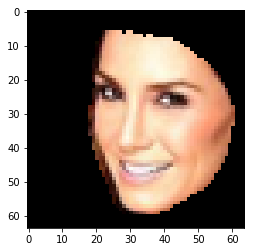

In [135]:
dreal = next(iter(realImage))
print dreal.shape
show(dreal[0])

torch.Size([3, 3, 64, 64])


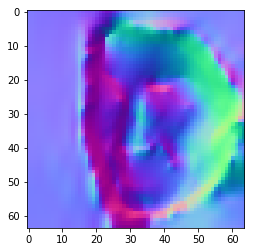

In [136]:
dreal = next(iter(rNormal))
print dreal.shape
show(denorm(dreal[0]))

In [137]:
# Resnet == Feature Net
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo


def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        self.inplanes = 16
        super(ResNet, self).__init__()
        self.conv1 = conv3x3(3, 16) 
        #, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, padding=1)
        self.layer1 = self._make_layer(block, 16, layers[0])
        self.layer2 = self._make_layer(block, 32, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 128, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(3)
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        self.lastFC = nn.Linear(128, 128)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        #print 'X shape before flatten:', x.shape
        x = x.view(x.size(0), -1)
        #print 'X shape after flatten:', x.shape
        x = self.lastFC(x)
        #x = self.fc(x)

        return x
    
class LightingNet(nn.Module):
    def __init__(self):
        super(LightingNet, self).__init__()
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 27) #18)
    
    def forward(self, x):
        #print x.shape
        x = self.fc1(x)
        x = F.relu(x)
        #print x.shape
        x = F.dropout(x)
        x = self.fc2(x)
        return x;

In [138]:
featureNet = ResNet(BasicBlock, [2, 2, 2, 2], 27)
lightingNet = LightingNet()

In [139]:
print featureNet

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (b

In [140]:
print lightingNet

LightingNet(
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=27, bias=True)
)


In [141]:
#syn1 = torch.FloatTensor(syn1)
#syn2 = torch.FloatTensor(syn2)
#slabel = torch.FloatTensor(slabel)

In [144]:
loss = nn.MSELoss()
def train(fNet, lNet, num_epochs = 3):
    for epoch in range(0, num_epochs):
        tLoss = 0
        for s1, s2, l in zip(synImage1, synImage2, synLabel):
            #print s1.type
            #print 's1', s1.shape
            batchSize = s1.shape[0]
            #print batchSize
            s1 = var(s1).type(torch.FloatTensor)
            l = var(l)
            #s1 = s1.transpose(1, 3)
            output = fNet(s1)
            #print 'out:', output.shape
            output = lNet(output)
            Floss = loss(output, l)
            Floss.backward()
            tLoss += Floss
        print 'Epoch:', epoch, 'Loss:', tLoss
    # return featureNet

In [ ]:
train(featureNet, lightingNet)